In [ ]:
!pip install biopython nltk numpy pandas scikit-learn matplotlib

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from Bio import Entrez
import numpy as np
import pandas as pd
import random
import string
import warnings
warnings.simplefilter("ignore")

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Fetching Data from PubMed**

In [ ]:
from Bio import Entrez

# Set your email address (required by NCBI)
Entrez.email = "nursyamimisubni06@gmail.com"

# Define search terms
search_terms = "breast cancer AND symptoms AND treatments"
start_year = "2018"
end_year = "2022"

# Perform the search
handle = Entrez.esearch(db="pubmed", term=search_terms, retmax=600, mindate=start_year, maxdate=end_year)
record = Entrez.read(handle)
handle.close()

id_list = record["IdList"]
summary_records = []

# Create a list to store the extracted data
data = []

# Create a set to store the processed PMIDs
processed_pmids = set()

for article_id in id_list:
  if article_id in processed_pmids:
      continue

  try:
      handle = Entrez.efetch(db='pubmed', id=article_id, retmode='xml')
      article = Entrez.read(handle)['PubmedArticle'][0]
      handle.close()

      title = article['MedlineCitation']['Article']['ArticleTitle']
      abstract = article['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', '')

      # Convert abstract to string
      abstract = str(abstract)

      # Append the extracted data to the list
      data.append({'Title': title, 'Abstract':abstract})

  except Exception as e:
        print(f"Error occurred for article ID {article_id}: {str(e)}")
        continue

In [ ]:
import csv
# Specify the output CSV file path
csv_file = 'breast_cancer_datasets.csv'

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['Title', 'Abstract']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerows(data)

print("Data saved to:", csv_file)

from google.colab import files

# Download the file
files.download('breast_cancer_datasets.csv')

Data saved to: breast_cancer_datasets.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(10)

Title  \
0  Evaluation of Lung and Liver Tumor Dose Covera...   
1  <sup>18</sup>F-fluorodeoxyglucose Positron Emi...   
2  Clinical Verification on the Predictors for Fe...   
3  Serum CCL7 Is a Novel Prognostic Biomarker of ...   
4  Diagnosing and Prognosing Bone Metastasis in P...   
5  Histological Risk Factors for Local Recurrence...   
6  Characteristics of Patients With Metastatic Br...   
7  Factor Analysis of Intraoperative Bleeding Los...   
8  Ultrasound-guided chemoradiotherapy of breast ...   
9  Charcoal Localization for Surgical Resection o...   

                                            Abstract  
0  [StringElement('Lung and liver tumor dose cove...  
1  [StringElement('The maximum standardized uptak...  
2  [StringElement('Febrile neutropenia (FN) is a ...  
3  [StringElement('Colorectal cancer is the third...  
4  ["Bone metastasis (BM) may occur in any type o...  
5  [StringElement('The rate of local recurrence (...  
6  [StringElement("Despite advances in the treatm...  
7  [StringElement('Intraoperative blood loss (IBL...  
8  ['Chemoradiotherapy with controlled-release na...  
9  ['<b>Background:</b> Breast cancer is more fre...

**Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries
import pandas as pd
import nltk

# Read the CSV data into a DataFrame
df = pd.read_csv("breast_cancer_datasets.csv")

# Split abstract into sentences
sentences_list = []
for abstract in df["Abstract"]:
  sentences = nltk.sent_tokenize(str(abstract))
  sentences_list.extend(sentences)

# Create a new DataFrame with only the sentences column
sentences_df = pd.DataFrame(sentences_list, columns=["sentences"])

# Save the sentences DataFrame to a new CSV file
#sentences_df.to_csv("bs_sentences_dataset.csv", index=False)


In [ ]:
sentences_df.head(10)

sentences
0  [StringElement('Lung and liver tumor dose cove...
1  ', attributes={'Label': 'BACKGROUND/AIM', 'Nlm...
2  The motion phantom was moved with the motion d...
3  A laser emitted from the linac head to the mov...
4  The dose volume histogram (DVH) of planning ta...
5  ', attributes={'Label': 'PATIENTS AND METHODS'...
6  The tracking errors in the longitudinal direct...
7  Although one case showed a decrease in the dos...
8  ', attributes={'Label': 'RESULTS', 'NlmCategor...
9  Even for respiratory patterns with large maxim...

In [ ]:
from nltk.corpus import stopwords

# Read CSV data
csv_data = open('/content/breast_cancer_datasets.csv','r', errors='ignore')
raw_data = csv_data.read()
raw_data = raw_data.lower()  # Converts to lowercase

# Tokenize text
sent_tokens = nltk.sent_tokenize(raw_data)  # Converts to list of sentences
word_tokens = nltk.word_tokenize(raw_data)  # Converts to list of words

# Define cleaning function
def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text)
    text = "".join(list(text))
    return text

cleaned_text = clean(raw_data)

# Tokenize cleaned text
text = word_tokenize(cleaned_text)
print("Tokenized Text:\n", text)

# Part-of-Speech (POS) tagging
pos_tag = nltk.pos_tag(text)
print("Tokenized Text with POS tags:\n", pos_tag)

# Lemmatization
lemmatizer = WordNetLemmatizer()
adjective_tags = ['JJ', 'JJR', 'JJS']
lemmatized_text = [lemmatizer.lemmatize(word, pos='a') if tag in adjective_tags else lemmatizer.lemmatize(word) for word, tag in pos_tag]
print("Text tokens after lemmatization of adjectives and nouns:\n", lemmatized_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in lemmatized_text if token not in stop_words]
print("Tokens after removing stopwords:\n", tokens)


Tokenized Text:
 ['title', ',', 'abstract', 'evaluation', 'of', 'lung', 'and', 'liver', 'tumor', 'dose', 'coverage', 'treated', 'with', 'the', 'cyberknife', 'synchrony', 'system', 'with', 'consideration', 'of', 'measured', 'tracking', 'errors.', ',', "''", '[', 'stringelement', '(', "'lung", 'and', 'liver', 'tumor', 'dose', 'coverage', 'was', 'evaluated', 'for', 'the', 'cyberknife', 'synchrony', 'respiratory', 'tracking', 'system', '(', 'srts', ')', 'with', 'consideration', 'of', 'the', 'motion', 'tracking', 'accuracy', 'measured', 'for', 'motion', 'patterns', 'of', 'individual', 'patients', '.', "'", ',', 'attributes=', '{', "'label", "'", ':', "'background/aim", "'", ',', "'nlmcategory", "'", ':', "'objective", "'", '}', ')', ',', 'stringelement', '(', "'seven", 'treatment', 'plans', 'of', 'six', 'cases', 'treated', 'with', 'the', 'srts', 'were', 'evaluated', '.', 'the', 'motion', 'phantom', 'was', 'moved', 'with', 'the', 'motion', 'data', 'derived', 'from', 'the', 'treatment', 'log'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from nltk.corpus import stopwords

# Read CSV data
csv_data = open('/content/breast_cancer_datasets.csv','r', errors='ignore')
raw_data = csv_data.read()
raw_data = raw_data.lower()  # Converts to lowercase

# Tokenize text
sent_tokens = nltk.sent_tokenize(raw_data)  # Converts to list of sentences
word_tokens = nltk.word_tokenize(raw_data)  # Converts to list of words

# Define cleaning function
def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text)
    text = "".join(list(text))
    return text

cleaned_text = clean(raw_data)

# Tokenize cleaned text
text = word_tokenize(cleaned_text)
print("Tokenized Text:\n", text)

# Part-of-Speech (POS) tagging
pos_tag = nltk.pos_tag(text)
print("Tokenized Text with POS tags:\n", pos_tag)

# Remove punctuation
# Join the tokens back into a string before removing punctuation
text_string = " ".join(text)
text_string = text_string.translate(str.maketrans("", "", string.punctuation))
print("Tokenized Text after punctuation removal:\n", text_string)

# Re-tokenize the string after punctuation removal
text = word_tokenize(text_string)

# Lemmatization
lemmatizer = WordNetLemmatizer()
adjective_tags = ['JJ', 'JJR', 'JJS']
lemmatized_text = [lemmatizer.lemmatize(word, pos='a') if tag in adjective_tags else lemmatizer.lemmatize(word) for word, tag in pos_tag]
print("Text tokens after lemmatization of adjectives and nouns:\n", lemmatized_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in lemmatized_text if token not in stop_words]
print("Tokens after removing stopwords:\n", tokens)


Tokenized Text:
 ['title', ',', 'abstract', 'evaluation', 'of', 'lung', 'and', 'liver', 'tumor', 'dose', 'coverage', 'treated', 'with', 'the', 'cyberknife', 'synchrony', 'system', 'with', 'consideration', 'of', 'measured', 'tracking', 'errors.', ',', "''", '[', 'stringelement', '(', "'lung", 'and', 'liver', 'tumor', 'dose', 'coverage', 'was', 'evaluated', 'for', 'the', 'cyberknife', 'synchrony', 'respiratory', 'tracking', 'system', '(', 'srts', ')', 'with', 'consideration', 'of', 'the', 'motion', 'tracking', 'accuracy', 'measured', 'for', 'motion', 'patterns', 'of', 'individual', 'patients', '.', "'", ',', 'attributes=', '{', "'label", "'", ':', "'background/aim", "'", ',', "'nlmcategory", "'", ':', "'objective", "'", '}', ')', ',', 'stringelement', '(', "'seven", 'treatment', 'plans', 'of', 'six', 'cases', 'treated', 'with', 'the', 'srts', 'were', 'evaluated', '.', 'the', 'motion', 'phantom', 'was', 'moved', 'with', 'the', 'motion', 'data', 'derived', 'from', 'the', 'treatment', 'log'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#test2
from nltk.corpus import stopwords
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Read CSV data
csv_data = open('/content/breast_cancer_datasets.csv','r', errors='ignore')
raw_data = csv_data.read()
raw_data = raw_data.lower()  # Converts to lowercase

# Tokenize text
sent_tokens = nltk.sent_tokenize(raw_data)  # Converts to list of sentences
word_tokens = nltk.word_tokenize(raw_data)  # Converts to list of words


# Download the stopwords list if necessary
#nltk.download('stopwords')


# Preprocessing function
def preprocess_text(text):

  # Convert text to lowercase
  text = text.lower()

  # Remove punctuation
  text = text.translate(str.maketrans("", "", string.punctuation))

  # Remove digits
  text = re.sub(r'\d+', '', text)

  # Tokenization
  tokens = word_tokenize(text)

  # Remove stopwords
  stop_words = set(stopwords.words("english"))
  tokens = [token for token in tokens if token not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Join the tokens back into a string
  processed_text = " ".join(tokens)

  return processed_text

# Apply preprocessing to the "sentences" column
sentences_df["sentences"] = sentences_df["sentences"].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
sentences_df.to_csv("sentences_data.csv", index=False)


In [ ]:
sentences_df.head(10)

sentences
0  stringelementlung liver tumor dose coverage ev...
1  attributeslabel backgroundaim nlmcategory obje...
2  motion phantom moved motion data derived treat...
3  laser emitted linac head moving phantom block ...
4  dose volume histogram dvh planning target volu...
5  attributeslabel patient method nlmcategory met...
6  tracking error longitudinal direction within ±...
7  although one case showed decrease dose coverin...
8  attributeslabel result nlmcategory result stri...
9  even respiratory pattern large maximum trackin...

**Text Labelling**

**Importing Cleaned Sentences Datasett**

In [ ]:
# upload the preprocessed dataset
from google.colab import files

upload = files.upload()

Saving preprocessed3_data.csv to preprocessed3_data.csv


In [ ]:
preprocessed_df = pd.read_csv('preprocessed3_data.csv')
#preprocessed_df = pd.read_csv('preprocessed1_data.csv')

In [ ]:
preprocessed_df.shape

(6988, 1)

In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  6968 non-null   object
dtypes: object(1)
memory usage: 54.7+ KB


**Define Keywords**

In [ ]:
# Define the symptoms and treatments
symptoms = [
    "lump",
    "breast lump",
    "thickened area of skin",
    "thickening",
    "nipple thah looks flattened",
    "turns inward",
    "changes in the color",
    "changes in size breast",
    "size",
    "shape",
    "appearance",
    "changes in shape breast",
    "changes in appearance breast",
    "orange peel",
    "dimpled",
    "peeling",
    "scaling",
    "crusting",
    "flaking",
    "nipple sores",
    "nipple discharge",
    "dimpling",
    "swelling",
    "discomfort",
    "rash",
    "red swollen",
    "blood-stained",
    "clear fluid discharge",
    "puckered",
    "scaly",
    "inflamed"
]
treatments = [
    "surgery",
    "lumpectomy",
    "mastectomy",
    "sentinel node biopsy",
    "axillary lymph node dissection",
    "radiation therapy",
    "radiation",
    "chemotherapy",
    "hormone therapy",
    "hormone-blocking therapy",
    "tamoxifen (nolvadex)",
    "aromatase inhibitors",
    "ovarian ablation or suppression",
    "goserelin (zoladex)",
    "biological treatment"
]

Function to Label Preprocessed Dataset

In [ ]:
preprocessed_df.head()

sentences
0  stringelementlung liver tumor dose coverage ev...
1  attributeslabel backgroundaim nlmcategory obje...
2  motion phantom moved motion data derived treat...
3  laser emitted linac head moving phantom block ...
4  dose volume histogram dvh planning target volu...

In [ ]:
preprocessed_df.shape

(6988, 1)

In [1]:
labelled_data = pd.DataFrame()

NameError: name 'pd' is not defined

In [ ]:
labelled_data['sentences'] = preprocessed_df['sentences']

In [ ]:
labelled_data.shape

(6980, 2)

In [ ]:
labelled_data.head()

sentences  label
0  stringelementlung liver tumor dose coverage ev...      0
1  attributeslabel backgroundaim nlmcategory obje...      0
2  motion phantom moved motion data derived treat...      0
3  laser emitted linac head moving phantom block ...      0
4  dose volume histogram dvh planning target volu...      0

**The Labelling Code**

In [ ]:
# Ensure that the 'sentences' column in labelled_data contains strings
labelled_data['sentences'] = labelled_data['sentences'].astype(str)

# CODE CHENG YI

from nltk.util import ngrams

# Assuming labelled_data is your DataFrame and 'sentences' is your column of interest
sentences = labelled_data['sentences']

# Create a new column for labels
labelled_data['label'] = 0

# Initialize dictionaries to store the matched symptom and treatment words for each sentence
symptom_words_dict = {}
treatment_words_dict = {}

# Define a function to get the n-gram of a keyword
def get_keyword_ngram(keyword):
    # Split the keyword by spaces and count the number of elements
    ngram = len(keyword.split())
    return ngram

# Loop through the test sentences
for i, sentence in enumerate(sentences,0):
    # Tokenize the preprocessed sentence into words
    words = nltk.word_tokenize(sentence)

    if sentence != labelled_data.loc[i, 'sentences']:
        print(f"Sentence {i}: {sentence}")


    # Initialize flags for symptom and treatment
    symptom_flag = False
    treatment_flag = False

    # Initialize lists to store the matched symptom and treatment words for this sentence
    symptom_words_dict[i] = []
    treatment_words_dict[i] = []

    # Loop through the keywords
    for keyword in symptoms + treatments:
        # Preprocess the keyword and get the n-gram
        ngram = get_keyword_ngram(keyword)

        # Generate n-grams of the appropriate length
        sentence_ngrams = list(ngrams(words, ngram))

        # Check if the keyword is in the sentence n-grams
        for gram in sentence_ngrams:
            if keyword == ' '.join(gram):
                matched_word = ' '.join(gram)
                if keyword in symptoms:
                    symptom_flag = True
                    symptom_words_dict[i].append(matched_word)  # Store the matched word
                if keyword in treatments:
                    treatment_flag = True
                    treatment_words_dict[i].append(matched_word)  # Store the matched word

    # Assign labels
    if symptom_flag and treatment_flag:
        labelled_data.loc[i, 'label'] = 3
        print(f"Sentence {i}: {sentence}")
        print("Label: 3")
        print("Symptom words:", symptom_words_dict[i])
        print("Treatment words:", treatment_words_dict[i])
        print()
    elif symptom_flag:
        labelled_data.loc[i, 'label'] = 1
    elif treatment_flag:
        labelled_data.loc[i, 'label'] = 2
    elif not symptom_flag and not treatment_flag:
        labelled_data.loc[i, 'label'] = 0

print(labelled_data.head())

Sentence 889: study larger sample size include patient receive nodal radiation necessary confirm finding
Label: 3
Symptom words: ['size']
Treatment words: ['radiation']

Sentence 1996: sentinel lymph node status tumor size chemotherapy endocrine therapy adjuvant radiation included cox multivariate analysis
Label: 3
Symptom words: ['size']
Treatment words: ['radiation', 'chemotherapy']

Sentence 2301: radically treated surgery adjuvant radiotherapy patient developed fever dyspnoea pleural thickening found ct scan
Label: 3
Symptom words: ['thickening']
Treatment words: ['surgery']

Sentence 2822: surgery done mass size reduced affected case
Label: 3
Symptom words: ['size']
Treatment words: ['surgery']

Sentence 2830: stringelementto reduce breast tumor size surgery neoadjuvant chemotherapy nac applied systematically patient local breast cancer
Label: 3
Symptom words: ['size']
Treatment words: ['surgery', 'chemotherapy']

Sentence 2842: attributeslabel result stringelementeven limited tra

In [ ]:
# Save the labelling data to a new CSV file
labelled_data.to_csv("labelled_data.csv", index=False)

First few rows of the dataset:
                                           sentences  label
0  stringelementlung liver tumor dose coverage ev...      0
1  attributeslabel backgroundaim nlmcategory obje...      0
2  motion phantom moved motion data derived treat...      0
3  laser emitted linac head moving phantom block ...      0
4  dose volume histogram dvh planning target volu...      0

Missing values in each column:
sentences    0
label        0
dtype: int64

Distribution of labels:
label
0    6371
2     521
1      88
3       8
Name: count, dtype: int64


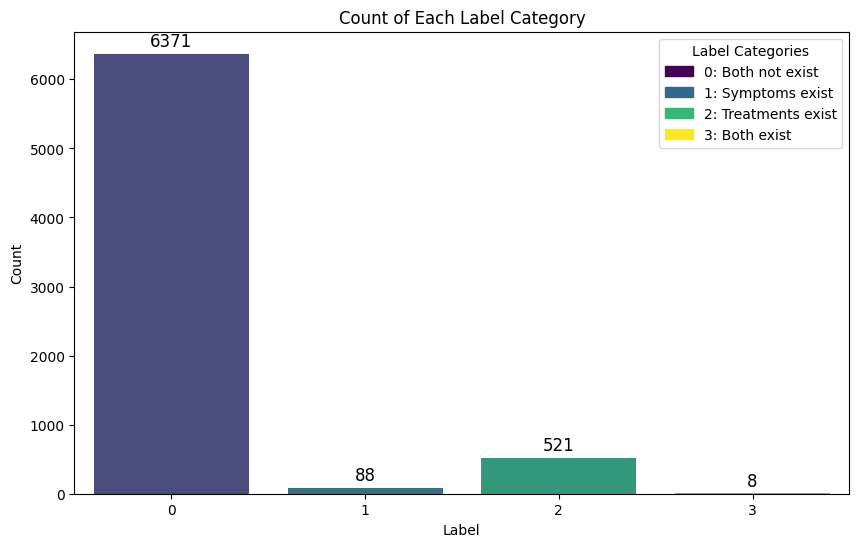

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume labelled_data is already created and preprocessed

# 1. Overview of the Dataset
# Display the first few rows
print("First few rows of the dataset:")
print(labelled_data.head())

# Check for missing values
print("\nMissing values in each column:")
print(labelled_data.isnull().sum())

# Distribution of labels
print("\nDistribution of labels:")
print(labelled_data['label'].value_counts())

# 2. Bar Chart of Label Counts
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='label', data=labelled_data, palette='viridis')
plt.title('Count of Each Label Category')
plt.xlabel('Label')
plt.ylabel('Count')

# Adding counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adding a custom legend
label_names = ['0: Both not exist', '1: Symptoms exist', '2: Treatments exist', '3: Both exist']
handles = [plt.Rectangle((0,0),1,1, color=plt.cm.viridis(i/3.)) for i in range(4)]
plt.legend(handles, label_names, title='Label Categories')

plt.show()


**Prepare Train Test Dataset**

70:30 Split

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

# 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training set shape (x_train): (4891,)
Testing set shape (x_test): (2097,)
Training set shape (y_train): (4891,)
Testing set shape (y_test): (2097,)


x_train_tfidf shape: (4891, 197136)
x_test_tfidf shape: (2097, 197136)
y_train shape: (4891,)
y_test shape: (2097,)


80:20 Split

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training set shape (x_train): (5590,)
Testing set shape (x_test): (1398,)
Training set shape (y_train): (5590,)
Testing set shape (y_test): (1398,)


x_train_tfidf shape: (5590, 222578)
x_test_tfidf shape: (1398, 222578)
y_train shape: (5590,)
y_test shape: (1398,)


90:10 Split

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

# 90:10 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training set shape (x_train): (6289,)
Testing set shape (x_test): (699,)
Training set shape (y_train): (6289,)
Testing set shape (y_test): (699,)


x_train_tfidf shape: (6289, 248385)
x_test_tfidf shape: (699, 248385)
y_train shape: (6289,)
y_test shape: (699,)


**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train_tfidf shape: (6289, 248385)
x_test_tfidf shape: (699, 248385)
y_train shape: (6289,)
y_test shape: (699,)


In [ ]:
# print shape to verify the split
print("x_train_tfidf  shape:", x_train_tfidf.shape)
print("x_test_tfidf  shape:", x_test_tfidf.shape)
print("y_train  shape:", y_train.shape)
print("y_test  shape:", y_test.shape)

x_train_tfidf  shape: (5581, 221072)
x_test_tfidf  shape: (1396, 221072)
y_train  shape: (5581,)
y_test  shape: (1396,)


**SVM**

C=0.8

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=0.8, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9940966010733453
Accuracy score for test dataset: 0.9821173104434907
SVM Accuracy Score ->  98.21173104434907 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1291
           1       1.00      0.32      0.48        22
           2       0.96      0.92      0.94        83
           3       0.00      0.00      0.00         2

    accuracy                           0.98      1398
   macro avg       0.74      0.56      0.60      1398
weighted avg       0.98      0.98      0.98      1398



C=0.9

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=0.9, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9960644007155635
Accuracy score for test dataset: 0.9835479256080114
SVM Accuracy Score ->  98.35479256080114 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1291
           1       1.00      0.32      0.48        22
           2       0.96      0.94      0.95        83
           3       0.00      0.00      0.00         2

    accuracy                           0.98      1398
   macro avg       0.74      0.56      0.61      1398
weighted avg       0.98      0.98      0.98      1398



C=1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9989266547406083
Accuracy score for test dataset: 0.9856938483547926
SVM Accuracy Score ->  98.56938483547926 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.41      0.58        22
           2       0.96      0.95      0.96        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.74      0.59      0.63      1398
weighted avg       0.98      0.99      0.98      1398



C=1.1

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.1, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9998211091234347
Accuracy score for test dataset: 0.9849785407725322
SVM Accuracy Score ->  98.49785407725322 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.41      0.58        22
           2       0.95      0.95      0.95        83
           3       0.00      0.00      0.00         2

    accuracy                           0.98      1398
   macro avg       0.73      0.59      0.63      1398
weighted avg       0.98      0.98      0.98      1398



C=1.2

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.2, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9998211091234347
Accuracy score for test dataset: 0.9864091559370529
SVM Accuracy Score ->  98.64091559370529 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.45      0.62        22
           2       0.95      0.96      0.96        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.74      0.60      0.64      1398
weighted avg       0.99      0.99      0.98      1398



/C=1.3

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))


SVM Model:
Accuracy score for train dataset: 0.9998211091234347
Accuracy score for test dataset: 0.9871244635193133
SVM Accuracy Score ->  98.71244635193133 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.45      0.62        22
           2       0.95      0.98      0.96        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.74      0.61      0.65      1398
weighted avg       0.99      0.99      0.98      1398



**Decision Tree Model**

max_depth=21

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=21, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))


Decision Tree Model:
Accuracy score for train dataset: 0.9669051878354203
Accuracy score for test dataset: 0.9635193133047211
Decision Tree Accuracy Score ->  96.35193133047211 %
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1291
           1       1.00      0.09      0.17        22
           2       0.96      0.66      0.79        83
           3       0.00      0.00      0.00         2

    accuracy                           0.96      1398
   macro avg       0.73      0.44      0.48      1398
weighted avg       0.96      0.96      0.96      1398



max_depth=22

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=22, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))


Decision Tree Model:
Accuracy score for train dataset: 0.981216457960644
Accuracy score for test dataset: 0.9814020028612304
Decision Tree Accuracy Score ->  98.14020028612303 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       0.88      0.68      0.77        22
           2       0.96      0.83      0.89        83
           3       0.00      0.00      0.00         2

    accuracy                           0.98      1398
   macro avg       0.71      0.63      0.66      1398
weighted avg       0.98      0.98      0.98      1398



/max_depth=23

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=23, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))


Decision Tree Model:
Accuracy score for train dataset: 0.9928443649373881
Accuracy score for test dataset: 0.9885550786838341
Decision Tree Accuracy Score ->  98.85550786838341 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1291
           1       0.95      0.82      0.88        22
           2       0.91      0.96      0.94        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.71      0.69      0.70      1398
weighted avg       0.99      0.99      0.99      1398



max_depth=24

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=24, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))


Decision Tree Model:
Accuracy score for train dataset: 0.9779964221824687
Accuracy score for test dataset: 0.9713876967095851
Decision Tree Accuracy Score ->  97.13876967095851 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1291
           1       0.78      0.32      0.45        22
           2       0.89      0.82      0.86        83
           3       0.00      0.00      0.00         2

    accuracy                           0.97      1398
   macro avg       0.66      0.53      0.57      1398
weighted avg       0.97      0.97      0.97      1398



max_depth=25

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=25, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))


Decision Tree Model:
Accuracy score for train dataset: 0.9976744186046511
Accuracy score for test dataset: 0.9907010014306151
Decision Tree Accuracy Score ->  99.07010014306151 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1291
           1       0.84      0.73      0.78        22
           2       0.95      1.00      0.98        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.70      0.68      0.69      1398
weighted avg       0.99      0.99      0.99      1398



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# Number of runs
n_runs = 10

# Store the accuracies
train_accuracies = []
test_accuracies = []

# Store the classification reports and confusion matrices
classification_reports = []
confusion_matrices = []

# Import the metrics module
from sklearn import metrics

# Loop for 10 runs
for i in range(n_runs):
    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier(max_depth=21, max_features=10000)

    # Train the model
    dt_model.fit(x_train_tfidf, y_train) # Changed X_train_tfidf to x_train_tfidf

    # Predictions
    dt_y_train_pred = dt_model.predict(x_train_tfidf) # Changed X_train_tfidf to x_train_tfidf
    dt_y_test_pred = dt_model.predict(x_test_tfidf) # Changed X_test_tfidf to x_test_tfidf

    # Evaluate the model
    dt_train_accuracy = accuracy_score(y_train, dt_y_train_pred)
    dt_test_accuracy = accuracy_score(y_test, dt_y_test_pred)
    print("\nTrain Accuracy", i, ": ", dt_train_accuracy)
    print("Test Accuracy", i, ": ", dt_test_accuracy)

    # Store the accuracies
    train_accuracies.append(dt_train_accuracy)
    test_accuracies.append(dt_test_accuracy)

    # Generate and store classification report
    report = metrics.classification_report(y_test, dt_y_test_pred, output_dict=True) # Now using metrics.classification_report
    classification_reports.append(report)

    # Generate and store confusion matrix
    cm = confusion_matrix(y_test, dt_y_test_pred)
    confusion_matrices.append(cm)

# Calculate the average accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)

print("\nDecision Tree Model (10 runs):")
print("Average Train Accuracy:", average_train_accuracy)
print("Average Test Accuracy:", average_test_accuracy)

# Average the classification reports
average_report = {}

# Identify keys that contain detailed metrics
metric_keys = [key for key in classification_reports[0].keys() if isinstance(classification_reports[0][key], dict)]

# Initialize average report structure
for key in metric_keys:
    average_report[key] = {}
    for metric in classification_reports[0][key].keys():
        average_report[key][metric] = np.mean([report[key][metric] for report in classification_reports])

# Handle the 'accuracy' key separately if it exists
if 'accuracy' in classification_reports[0]:
    average_report['accuracy'] = np.mean([report['accuracy'] for report in classification_reports])

# Print the average classification report
print("\nAverage Classification Report:")
for label, metrics in average_report.items():
    if isinstance(metrics, dict):  # Detailed metrics
        print(f"Class: {label}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.2f}")
    else:  # Overall accuracy
        print(f"{label}: {metrics:.2f}")


Train Accuracy 0 :  0.9710196779964222
Test Accuracy 0 :  0.9613733905579399

Train Accuracy 1 :  0.9824686940966011
Test Accuracy 1 :  0.9828326180257511

Train Accuracy 2 :  0.9697674418604652
Test Accuracy 2 :  0.9620886981402003

Train Accuracy 3 :  0.9735241502683363
Test Accuracy 3 :  0.9778254649499285

Train Accuracy 4 :  0.950268336314848
Test Accuracy 4 :  0.9434907010014306

Train Accuracy 5 :  0.952772808586762
Test Accuracy 5 :  0.9570815450643777

Train Accuracy 6 :  0.9731663685152058
Test Accuracy 6 :  0.9635193133047211

Train Accuracy 7 :  0.9935599284436494
Test Accuracy 7 :  0.9921316165951359

Train Accuracy 8 :  0.9973166368515206
Test Accuracy 8 :  0.9921316165951359

Train Accuracy 9 :  0.9930232558139535
Test Accuracy 9 :  0.9892703862660944

Decision Tree Model (10 runs):
Average Train Accuracy: 0.9756887298747765
Average Test Accuracy: 0.9721745350500715

Average Classification Report:
Class: 0
  precision: 0.98
  recall: 1.00
  f1-score: 0.99
  support: 129

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=1.0)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))


Naive Bayes Model:
Accuracy score for train dataset: 0.9087656529516994
Accuracy score for test dataset: 0.9234620886981402
Naive Bayes Accuracy Score ->  92.34620886981402 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1291
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00         2

    accuracy                           0.92      1398
   macro avg       0.23      0.25      0.24      1398
weighted avg       0.85      0.92      0.89      1398



/alpha=0.1

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))


Naive Bayes Model:
Accuracy score for train dataset: 0.9994633273703041
Accuracy score for test dataset: 0.9341917024320457
Naive Bayes Accuracy Score ->  93.41917024320458 %
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1291
           1       1.00      0.14      0.24        22
           2       1.00      0.14      0.25        83
           3       0.00      0.00      0.00         2

    accuracy                           0.93      1398
   macro avg       0.73      0.32      0.36      1398
weighted avg       0.94      0.93      0.91      1398



alpha=0.2

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.2, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))


Naive Bayes Model:
Accuracy score for train dataset: 0.9967799642218247
Accuracy score for test dataset: 0.9313304721030042
Naive Bayes Accuracy Score ->  93.13304721030042 %
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1291
           1       1.00      0.05      0.09        22
           2       1.00      0.12      0.22        83
           3       0.00      0.00      0.00         2

    accuracy                           0.93      1398
   macro avg       0.73      0.29      0.32      1398
weighted avg       0.93      0.93      0.90      1398



alpha=0.3

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.3, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))


Naive Bayes Model:
Accuracy score for train dataset: 0.986046511627907
Accuracy score for test dataset: 0.9277539341917024
Naive Bayes Accuracy Score ->  92.77539341917024 %
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1291
           1       0.00      0.00      0.00        22
           2       1.00      0.07      0.13        83
           3       0.00      0.00      0.00         2

    accuracy                           0.93      1398
   macro avg       0.48      0.27      0.27      1398
weighted avg       0.92      0.93      0.90      1398



For 3 Models

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model with hyperparameters
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tfidf, y_train)

# Predictions for SVM
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)
print("SVM Accuracy Score -> ", svm_test_accuracy * 100, "%")

# Classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_test_pred))

# Initialize and train the Decision Tree model with hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=25, max_features=10000, min_samples_split=2)
dt_model.fit(x_train_tfidf, y_train)

# Predictions for Decision Tree
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate Decision Tree Model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

# Classification report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_test_pred))

# Initialize and train the Naive Bayes model with hyperparameters
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
nb_model.fit(x_train_tfidf, y_train)

# Predictions for Naive Bayes
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate Naive Bayes Model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

# Classification report for Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_y_test_pred))



SVM Model:
Accuracy score for train dataset: 0.9998211091234347
Accuracy score for test dataset: 0.9871244635193133
SVM Accuracy Score ->  98.71244635193133 %

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.45      0.62        22
           2       0.95      0.98      0.96        83
           3       0.00      0.00      0.00         2

    accuracy                           0.99      1398
   macro avg       0.74      0.61      0.65      1398
weighted avg       0.99      0.99      0.98      1398


Decision Tree Model:
Accuracy score for train dataset: 0.9940966010733453
Accuracy score for test dataset: 0.9907010014306151
Decision Tree Accuracy Score ->  99.07010014306151 %

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1291
           1       0.94      0.73      0.82       

**RATIO**

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

# 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\n")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))

print("\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=25, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))

print("\n")

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.3, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))

Training set shape (x_train): (4886,)
Testing set shape (x_test): (2094,)
Training set shape (y_train): (4886,)
Testing set shape (y_test): (2094,)


x_train_tfidf shape: (4886, 196685)
x_test_tfidf shape: (2094, 196685)
y_train shape: (4886,)
y_test shape: (2094,)



SVM Model:
Accuracy score for train dataset: 1.0
Accuracy score for test dataset: 0.9856733524355301
SVM Accuracy Score ->  98.56733524355302 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       1.00      0.40      0.57        30
           2       0.97      0.94      0.95       134

    accuracy                           0.99      2094
   macro avg       0.99      0.78      0.84      2094
weighted avg       0.99      0.99      0.98      2094




Decision Tree Model:
Accuracy score for train dataset: 0.9993860008186656
Accuracy score for test dataset: 0.9947468958930277
Decision Tree Accuracy Score ->  99.47468958930277 %
              precision 

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

# 80:20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\n")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))

print("\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=25, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))

print("\n")

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.3, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))

Training set shape (x_train): (5584,)
Testing set shape (x_test): (1396,)
Training set shape (y_train): (5584,)
Testing set shape (y_test): (1396,)


x_train_tfidf shape: (5584, 222898)
x_test_tfidf shape: (1396, 222898)
y_train shape: (5584,)
y_test shape: (1396,)



SVM Model:
Accuracy score for train dataset: 1.0
Accuracy score for test dataset: 0.9899713467048711
SVM Accuracy Score ->  98.99713467048711 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1295
           1       1.00      0.50      0.67        20
           2       1.00      0.95      0.97        81

    accuracy                           0.99      1396
   macro avg       1.00      0.82      0.88      1396
weighted avg       0.99      0.99      0.99      1396




Decision Tree Model:
Accuracy score for train dataset: 0.9742120343839542
Accuracy score for test dataset: 0.9663323782234957
Decision Tree Accuracy Score ->  96.63323782234957 %
              precision 

In [ ]:
from sklearn.model_selection import train_test_split

x = labelled_data['sentences']
y = labelled_data['label']

# 90:10 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print("Training set shape (x_train):", x_train.shape)
print("Testing set shape (x_test):", x_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

print("\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

# Applying TF-IDF to the splitted dataset
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# print shape to verify the split
print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("\n")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report # import classification_report

# SVM Model - linear
# fit the training dataset on the classifier
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto') # hypermeters

# Train the model
svm_model.fit(x_train_tfidf,y_train)

# Predictions
svm_y_train_pred = svm_model.predict(x_train_tfidf)
svm_y_test_pred = svm_model.predict(x_test_tfidf)

# Evaluate SVM Model - Use accuracy_score function to get the accuracy
svm_train_accuracy = accuracy_score(svm_y_train_pred, y_train)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

print("\nSVM Model:")
print("Accuracy score for train dataset:", svm_train_accuracy)
print("Accuracy score for test dataset:", svm_test_accuracy)

# Percentage of accuracy
print("SVM Accuracy Score -> ", svm_test_accuracy*100, "%")

# Print classification report
print(classification_report(y_test, svm_y_test_pred))

print("\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=25, max_features=10000)

# Train the model
dt_model.fit(x_train_tfidf, y_train)

# Make predictions
dt_y_train_pred = dt_model.predict(x_train_tfidf)
dt_y_test_pred = dt_model.predict(x_test_tfidf)

# Evaluate the model
dt_train_accuracy = accuracy_score(dt_y_train_pred, y_train)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

print("\nDecision Tree Model:")
print("Accuracy score for train dataset:", dt_train_accuracy)
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")

print(classification_report(y_test, dt_y_test_pred))

print("\n")

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB(alpha=0.3, fit_prior=True, force_alpha=True)

# Train the model
nb_model.fit(x_train_tfidf, y_train)

# Make predictions
nb_y_train_pred = nb_model.predict(x_train_tfidf)
nb_y_test_pred = nb_model.predict(x_test_tfidf)

# Evaluate the model
nb_train_accuracy = accuracy_score(nb_y_train_pred, y_train)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

print("\nNaive Bayes Model:")
print("Accuracy score for train dataset:", nb_train_accuracy)
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")

print(classification_report(y_test, nb_y_test_pred))

Training set shape (x_train): (6282,)
Testing set shape (x_test): (698,)
Training set shape (y_train): (6282,)
Testing set shape (y_test): (698,)


x_train_tfidf shape: (6282, 247694)
x_test_tfidf shape: (698, 247694)
y_train shape: (6282,)
y_test shape: (698,)



SVM Model:
Accuracy score for train dataset: 1.0
Accuracy score for test dataset: 0.994269340974212
SVM Accuracy Score ->  99.42693409742121 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       642
           1       1.00      0.69      0.82        13
           2       1.00      1.00      1.00        43

    accuracy                           0.99       698
   macro avg       1.00      0.90      0.94       698
weighted avg       0.99      0.99      0.99       698




Decision Tree Model:
Accuracy score for train dataset: 0.9906080865966252
Accuracy score for test dataset: 0.9885386819484241
Decision Tree Accuracy Score ->  98.8538681948424 %
              precision    rec

**Plot**


SVM Model:
Accuracy score for test dataset: 0.994269340974212
SVM Accuracy Score ->  99.42693409742121 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       642
           1       1.00      0.69      0.82        13
           2       1.00      1.00      1.00        43

    accuracy                           0.99       698
   macro avg       1.00      0.90      0.94       698
weighted avg       0.99      0.99      0.99       698


Decision Tree Model:
Accuracy score for test dataset: 0.9928366762177651
Decision Tree Accuracy Score ->  99.2836676217765 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       642
           1       1.00      0.77      0.87        13
           2       0.98      0.95      0.96        43

    accuracy                           0.99       698
   macro avg       0.99      0.91      0.94       698
weighted avg       0.99      0.99      0.99       698


Naive

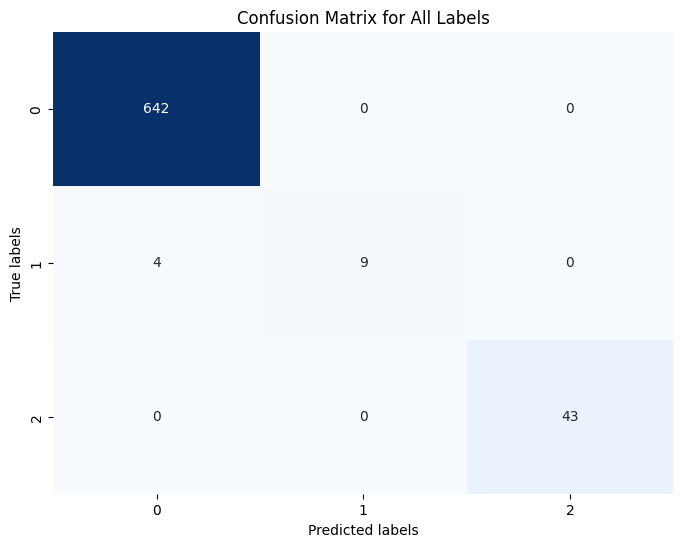

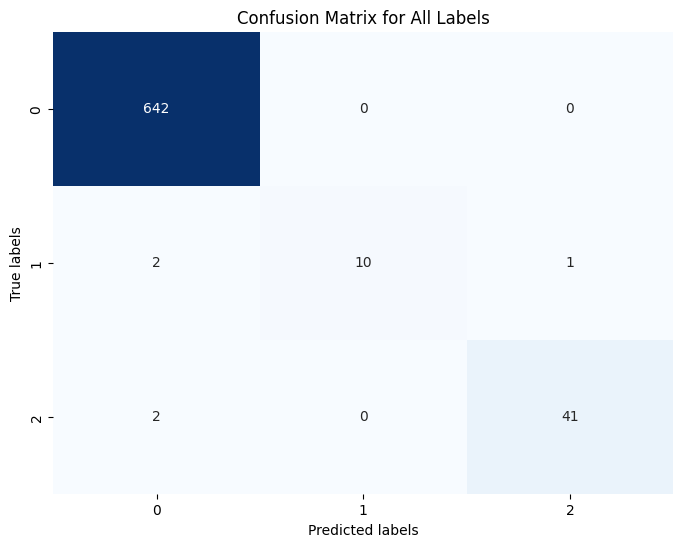

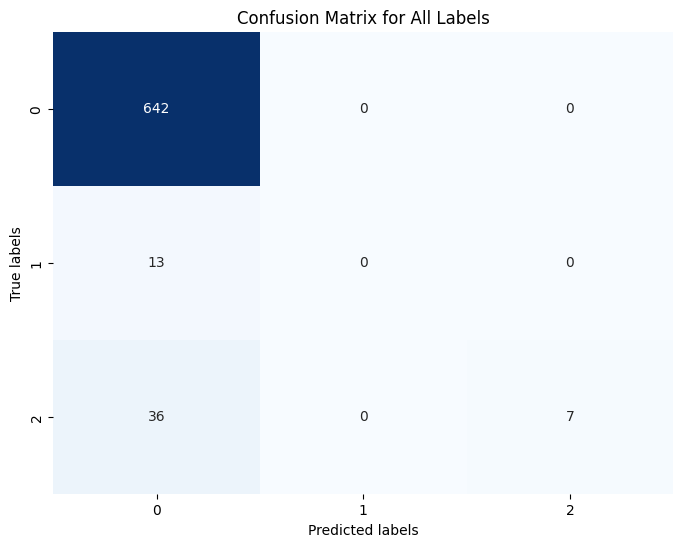


SVM Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 2 0 0 0 0 0 0 0]

Decision Tree Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 2 0 0 0 0 0 0 0]

Naive Bayes Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 0 0 0 0 0 0 0 0]


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assume labelled_data is already created as shown in previous code snippets
# Check for NaN values in the sentences column and handle them
labelled_data['sentences'].replace('', np.nan, inplace=True)
labelled_data.dropna(subset=['sentences'], inplace=True)

# Filter to keep only the three relevant classes
labelled_data = labelled_data[labelled_data['label'].isin([0, 1, 2])]

# Extract features and labels
x = labelled_data['sentences']
y = labelled_data['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# SVM Model with Hyperparameters
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tfidf, y_train)
svm_y_test_pred = svm_model.predict(x_test_tfidf)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

# Decision Tree Model with Hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=22, max_features=10000, min_samples_split=2)
dt_model.fit(x_train_tfidf, y_train)
dt_y_test_pred = dt_model.predict(x_test_tfidf)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

# Naive Bayes Model with Hyperparameters
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
nb_model.fit(x_train_tfidf, y_train)
nb_y_test_pred = nb_model.predict(x_test_tfidf)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

# Print the accuracy scores and classification reports
print("\nSVM Model:")
print("Accuracy score for test dataset:", svm_test_accuracy)
print("SVM Accuracy Score -> ", svm_test_accuracy * 100, "%")
print(classification_report(y_test, svm_y_test_pred))

print("\nDecision Tree Model:")
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")
print(classification_report(y_test, dt_y_test_pred))

print("\nNaive Bayes Model:")
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")
print(classification_report(y_test, nb_y_test_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Confusion Matrix for SVM
svm_cm_cm = confusion_matrix(y_test, svm_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for All Labels')
plt.show()

print("\n")

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for All Labels')
plt.show()

print("\n")

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for All Labels')
plt.show()

# Show true and predicted tables for the first two models
# For SVM
print("\nSVM Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", svm_y_test_pred[:10])

# For Decision Tree
print("\nDecision Tree Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", dt_y_test_pred[:10])

# For Naive Bayes
print("\nNaive Bayes Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", nb_y_test_pred[:10])



SVM Model:
Accuracy score for test dataset: 0.994269340974212
SVM Accuracy Score ->  99.42693409742121 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       642
           1       1.00      0.69      0.82        13
           2       1.00      1.00      1.00        43

    accuracy                           0.99       698
   macro avg       1.00      0.90      0.94       698
weighted avg       0.99      0.99      0.99       698


Decision Tree Model:
Accuracy score for test dataset: 0.9899713467048711
Decision Tree Accuracy Score ->  98.99713467048711 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       642
           1       0.91      0.77      0.83        13
           2       0.98      0.93      0.95        43

    accuracy                           0.99       698
   macro avg       0.96      0.90      0.93       698
weighted avg       0.99      0.99      0.99       698


Naiv

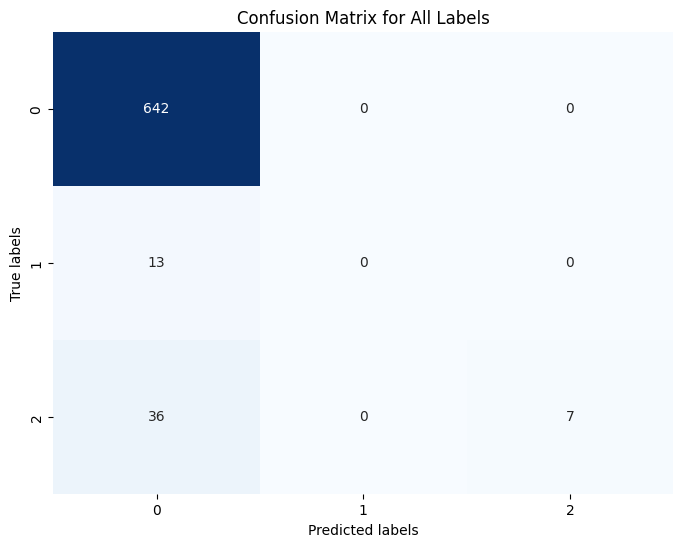

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assume labelled_data is already created as shown in previous code snippets
# Check for NaN values in the sentences column and handle them
labelled_data['sentences'].replace('', np.nan, inplace=True)
labelled_data.dropna(subset=['sentences'], inplace=True)

# Filter to keep only the three relevant classes
labelled_data = labelled_data[labelled_data['label'].isin([0, 1, 2])]

# Extract features and labels
x = labelled_data['sentences']
y = labelled_data['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# SVM Model with Hyperparameters
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tfidf, y_train)
svm_y_test_pred = svm_model.predict(x_test_tfidf)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

# Decision Tree Model with Hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=25, max_features=10000, min_samples_split=2)
dt_model.fit(x_train_tfidf, y_train)
dt_y_test_pred = dt_model.predict(x_test_tfidf)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

# Naive Bayes Model with Hyperparameters
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
nb_model.fit(x_train_tfidf, y_train)
nb_y_test_pred = nb_model.predict(x_test_tfidf)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

# Print the accuracy scores and classification reports
print("\nSVM Model:")
print("Accuracy score for test dataset:", svm_test_accuracy)
print("SVM Accuracy Score -> ", svm_test_accuracy * 100, "%")
print(classification_report(y_test, svm_y_test_pred))

print("\nDecision Tree Model:")
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")
print(classification_report(y_test, dt_y_test_pred))

print("\nNaive Bayes Model:")
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")
print(classification_report(y_test, nb_y_test_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for All Labels')
plt.show()



SVM Model:
Accuracy score for test dataset: 0.994269340974212
SVM Accuracy Score ->  99.42693409742121 %
                    precision    recall  f1-score   support

    Both Not Exist       0.99      1.00      1.00       642
  Symptom(s) Exist       1.00      0.69      0.82        13
Treatment(s) Exist       1.00      1.00      1.00        43

          accuracy                           0.99       698
         macro avg       1.00      0.90      0.94       698
      weighted avg       0.99      0.99      0.99       698


Decision Tree Model:
Accuracy score for test dataset: 0.9899713467048711
Decision Tree Accuracy Score ->  98.99713467048711 %
                    precision    recall  f1-score   support

    Both Not Exist       0.99      1.00      1.00       642
  Symptom(s) Exist       0.91      0.77      0.83        13
Treatment(s) Exist       0.98      0.93      0.95        43

          accuracy                           0.99       698
         macro avg       0.96      0.90   

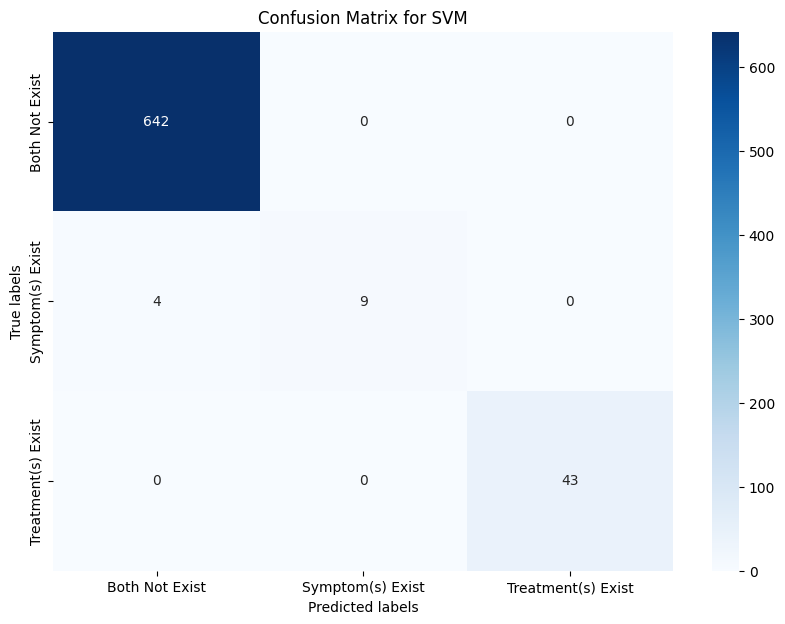

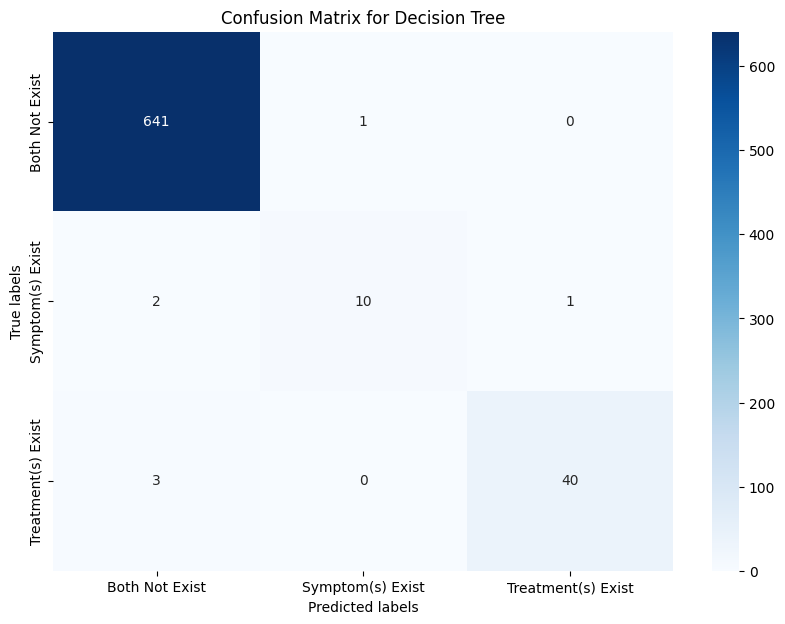

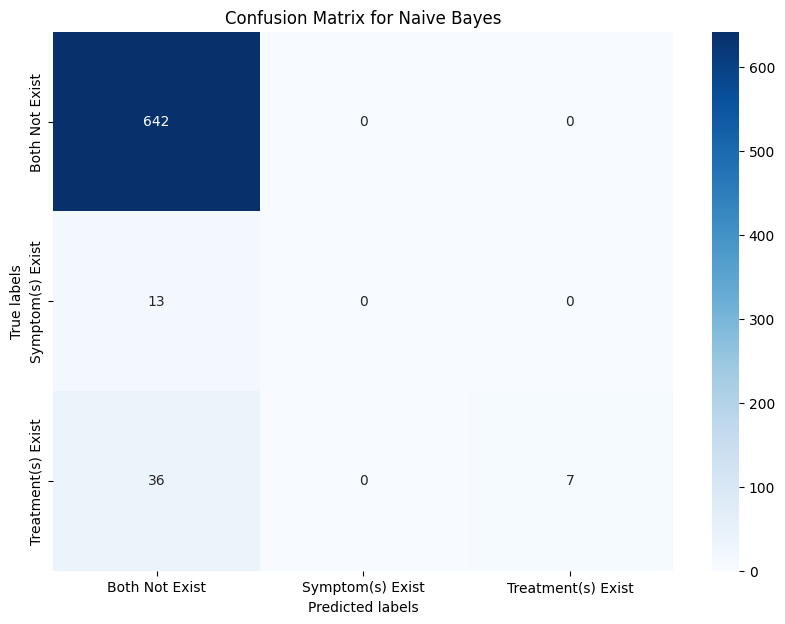


SVM Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 2 0 0 0 0 0 0 0]

Decision Tree Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 2 0 0 0 0 0 0 0]

Naive Bayes Model: True vs Predicted
True labels:      [2 0 2 0 0 0 0 0 0 0]
Predicted labels: [2 0 0 0 0 0 0 0 0 0]


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assume labelled_data is already created as shown in previous code snippets
# Check for NaN values in the sentences column and handle them
labelled_data['sentences'].replace('', np.nan, inplace=True)
labelled_data.dropna(subset=['sentences'], inplace=True)

# Filter to keep only the three relevant classes
labelled_data = labelled_data[labelled_data['label'].isin([0, 1, 2])]

# Extract features and labels
x = labelled_data['sentences']
y = labelled_data['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# SVM Model with Hyperparameters
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tfidf, y_train)
svm_y_test_pred = svm_model.predict(x_test_tfidf)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

# Decision Tree Model with Hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=25, max_features=10000, min_samples_split=2)
dt_model.fit(x_train_tfidf, y_train)
dt_y_test_pred = dt_model.predict(x_test_tfidf)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

# Naive Bayes Model with Hyperparameters
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
nb_model.fit(x_train_tfidf, y_train)
nb_y_test_pred = nb_model.predict(x_test_tfidf)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

# Print the accuracy scores and classification reports
print("\nSVM Model:")
print("Accuracy score for test dataset:", svm_test_accuracy)
print("SVM Accuracy Score -> ", svm_test_accuracy * 100, "%")
print(classification_report(y_test, svm_y_test_pred, target_names=["Both Not Exist", "Symptom(s) Exist", "Treatment(s) Exist"]))

print("\nDecision Tree Model:")
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")
print(classification_report(y_test, dt_y_test_pred, target_names=["Both Not Exist", "Symptom(s) Exist", "Treatment(s) Exist"]))

print("\nNaive Bayes Model:")
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")
print(classification_report(y_test, nb_y_test_pred, target_names=["Both Not Exist", "Symptom(s) Exist", "Treatment(s) Exist"]))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Labels
labels = ["Both Not Exist", "Symptom(s) Exist", "Treatment(s) Exist"]

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_test_pred)
plot_confusion_matrix(svm_cm, "SVM", labels)

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_test_pred)
plot_confusion_matrix(dt_cm, "Decision Tree", labels)

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
plot_confusion_matrix(nb_cm, "Naive Bayes", labels)

# Show true and predicted tables for the first two models
# For SVM
print("\nSVM Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", svm_y_test_pred[:10])

# For Decision Tree
print("\nDecision Tree Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", dt_y_test_pred[:10])

# For Naive Bayes
print("\nNaive Bayes Model: True vs Predicted")
print("True labels:     ", y_test.values[:10])
print("Predicted labels:", nb_y_test_pred[:10])



SVM Model:
Accuracy score for test dataset: 0.9856733524355301
SVM Accuracy Score ->  98.56733524355302 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1272
           1       1.00      0.58      0.74        24
           2       0.98      0.92      0.95       100

    accuracy                           0.99      1396
   macro avg       0.99      0.83      0.89      1396
weighted avg       0.99      0.99      0.98      1396


Decision Tree Model:
Accuracy score for test dataset: 0.9820916905444126
Decision Tree Accuracy Score ->  98.20916905444126 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.54      0.70        24
           2       0.98      0.88      0.93       100

    accuracy                           0.98      1396
   macro avg       0.99      0.81      0.87      1396
weighted avg       0.98      0.98      0.98      1396


Nai

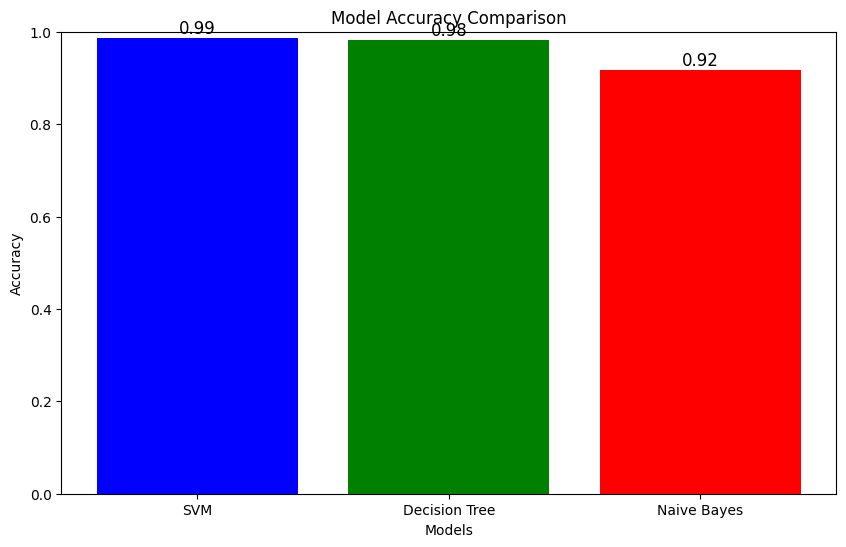

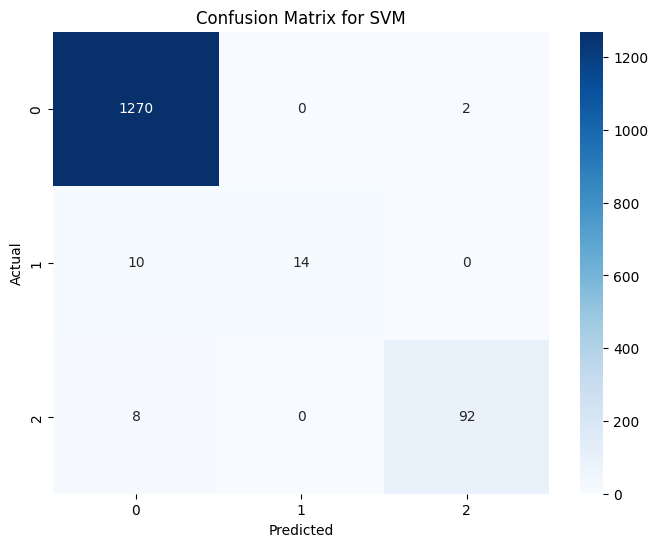

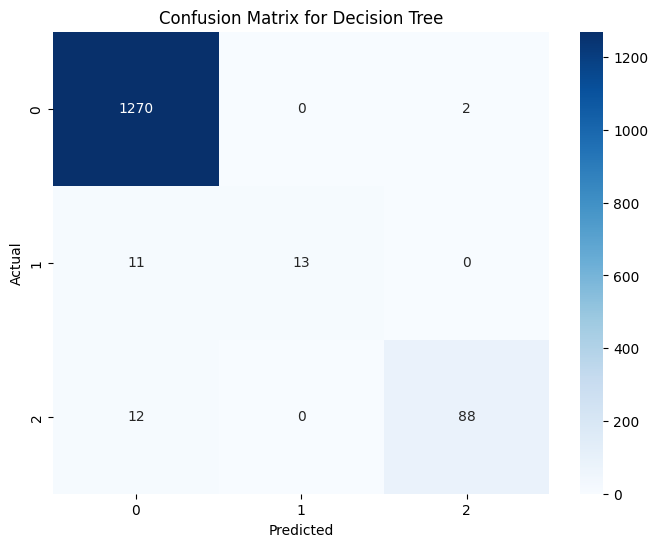

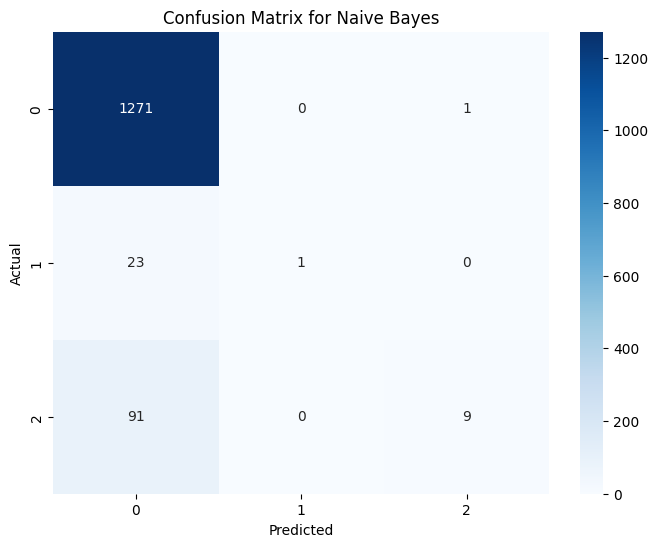

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assume labelled_data is already created as shown in previous code snippets
# Check for NaN values in the sentences column and handle them
labelled_data['sentences'].replace('', np.nan, inplace=True)
labelled_data.dropna(subset=['sentences'], inplace=True)

# Extract features and labels
x = labelled_data['sentences']
y = labelled_data['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
tfidf_vectorizer.fit(x_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# SVM Model with Hyperparameters
svm_model = SVC(C=1.3, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tfidf, y_train)
svm_y_test_pred = svm_model.predict(x_test_tfidf)
svm_test_accuracy = accuracy_score(svm_y_test_pred, y_test)

# Decision Tree Model with Hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=23, max_features=10000, min_samples_split=2)
dt_model.fit(x_train_tfidf, y_train)
dt_y_test_pred = dt_model.predict(x_test_tfidf)
dt_test_accuracy = accuracy_score(dt_y_test_pred, y_test)

# Naive Bayes Model with Hyperparameters
nb_model = MultinomialNB(alpha=0.1, fit_prior=True, force_alpha=True)
nb_model.fit(x_train_tfidf, y_train)
nb_y_test_pred = nb_model.predict(x_test_tfidf)
nb_test_accuracy = accuracy_score(nb_y_test_pred, y_test)

# Print the accuracy scores and classification reports
print("\nSVM Model:")
print("Accuracy score for test dataset:", svm_test_accuracy)
print("SVM Accuracy Score -> ", svm_test_accuracy * 100, "%")
print(classification_report(y_test, svm_y_test_pred))

print("\nDecision Tree Model:")
print("Accuracy score for test dataset:", dt_test_accuracy)
print("Decision Tree Accuracy Score -> ", dt_test_accuracy * 100, "%")
print(classification_report(y_test, dt_y_test_pred))

print("\nNaive Bayes Model:")
print("Accuracy score for test dataset:", nb_test_accuracy)
print("Naive Bayes Accuracy Score -> ", nb_test_accuracy * 100, "%")
print(classification_report(y_test, nb_y_test_pred))

# Plotting the accuracies of each model
models = ['SVM', 'Decision Tree', 'Naive Bayes']
accuracies = [svm_test_accuracy, dt_test_accuracy, nb_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f"{accuracies[i]:.2f}", ha='center', fontsize=12)
plt.show()

# Plotting confusion matrices for each model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_test_pred)
plot_confusion_matrix(svm_cm, "SVM")

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_test_pred)
plot_confusion_matrix(dt_cm, "Decision Tree")

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
plot_confusion_matrix(nb_cm, "Naive Bayes")


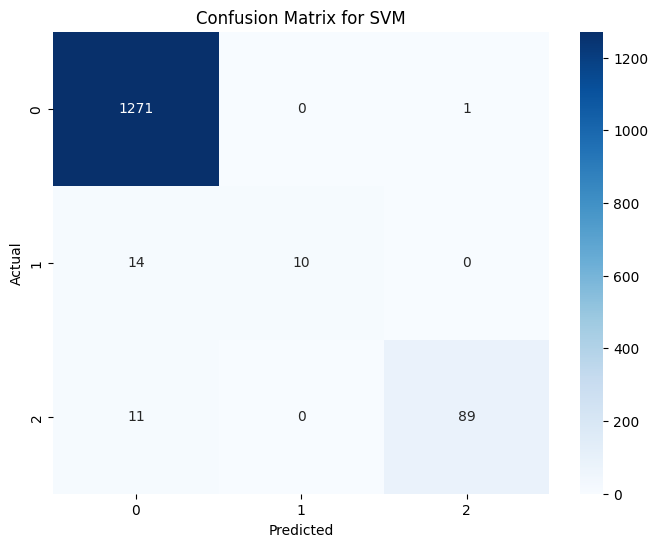

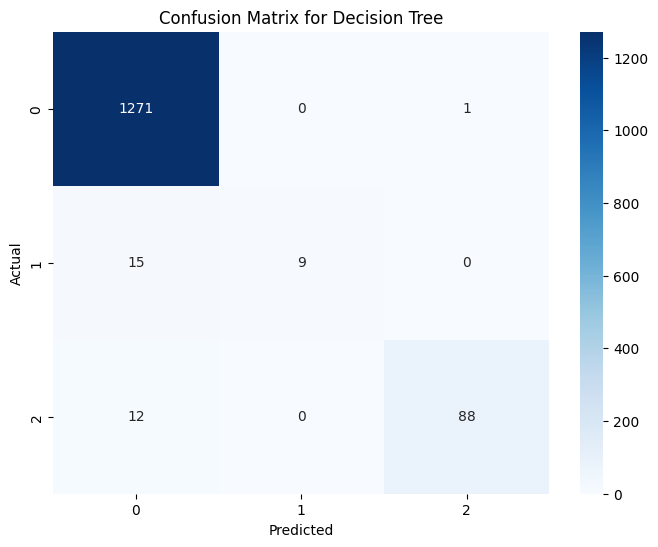

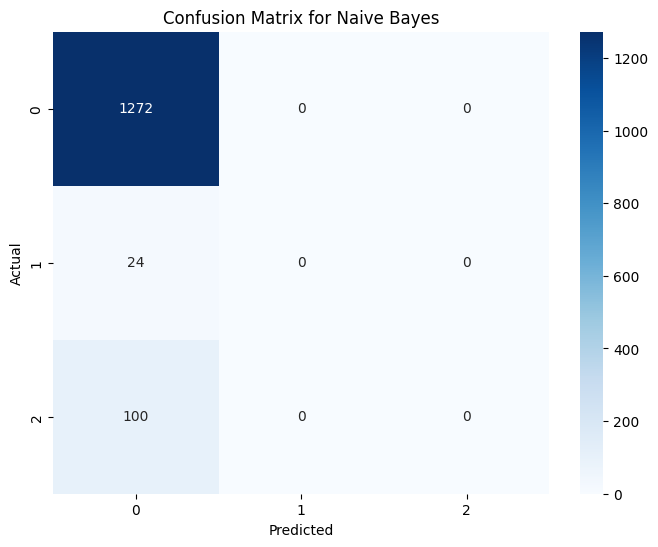

In [ ]:
# Plotting confusion matrices for each model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_test_pred)
plot_confusion_matrix(svm_cm, "SVM")

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_test_pred)
plot_confusion_matrix(dt_cm, "Decision Tree")

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
plot_confusion_matrix(nb_cm, "Naive Bayes")
